In [89]:
import numpy as np
import pandas as pd

In [90]:
data = pd.read_excel("C:/Users/91971/Downloads/15647NeonBand.RarZipExtractorPro_g3b9h1p9bdemw!App/Rar Zip Extractor Pro/15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform/Womens Clothing Reviews Data.xlsx")

In [91]:
data.head()

Product ID        Category Subcategory1 SubCategory2   Location Channel  \
0         767       Initmates     Intimate    Intimates     Mumbai  Mobile   
1        1080         General      Dresses      Dresses  Bangalore  Mobile   
2        1077         General      Dresses      Dresses    Gurgaon  Mobile   
3        1049  General Petite      Bottoms        Pants    Chennai     Web   
4         847         General         Tops      Blouses  Bangalore     Web   

   Customer Age             Review Title  \
0            33                      NaN   
1            34                      NaN   
2            60  Some major design flaws   
3            50         My favorite buy!   
4            47         Flattering shirt   

                                         Review Text  Rating  Recommend Flag  
0  Absolutely wonderful - silky and sexy and comf...       4               1  
1  Love this dress!  it's sooo pretty.  i happene...       5               1  
2  I had such high hopes for this dress and reall...       3               0  
3  I love, love, love this jumpsuit. it's fun, fl...       5               1  
4  This shirt is very flattering to all due to th...       5               1

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [93]:
data.isnull().sum(axis=0)

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [94]:
data.dropna(axis=0,inplace=True)

In [95]:
data.isnull().sum(axis=0)

Product ID        0
Category          0
Subcategory1      0
SubCategory2      0
Location          0
Channel           0
Customer Age      0
Review Title      0
Review Text       0
Rating            0
Recommend Flag    0
dtype: int64

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      19662 non-null  int64 
 1   Category        19662 non-null  object
 2   Subcategory1    19662 non-null  object
 3   SubCategory2    19662 non-null  object
 4   Location        19662 non-null  object
 5   Channel         19662 non-null  object
 6   Customer Age    19662 non-null  int64 
 7   Review Title    19662 non-null  object
 8   Review Text     19662 non-null  object
 9   Rating          19662 non-null  int64 
 10  Recommend Flag  19662 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.8+ MB


In [97]:
data = data.rename(columns = {'Product ID':'ID','Customer Age':'Age','Review Title':'Title','Review Text':'text',
                             'Recommend Flag':'Flag'})

In [98]:
#Exploratory Analysis

In [120]:
#nlp
import string
import re



In [261]:
def preprocess(text):
    text = text.replace("(<br/>)", " ")
    text = text.replace("(&amp)", " ")
    text = text.replace("(&gt)", " ")
    text = text.replace("(&lt)", " ")
    text = text.replace("(\xa0)", " ")
    #text = re.sub(r' +', ' ', str(text))
    #text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", str(text))
    text = text.str.lower()
    text = text.str.strip()
    text = text.replace('\n'," ")
    text = text.str.replace("/", " ")
    text = text.str.replace("!", " ")
    text = text.str.replace(".", " ")
    text = text.str.replace("-", " ")
    text = text.str.replace(",", " ")
    
    return (text)

data['clean_text'] = preprocess(data['text'])

In [262]:
data

ID        Category Subcategory1 SubCategory2   Location Channel  Age  \
2      1077         General      Dresses      Dresses    Gurgaon  Mobile   60   
3      1049  General Petite      Bottoms        Pants    Chennai     Web   50   
4       847         General         Tops      Blouses  Bangalore     Web   47   
5      1080         General      Dresses      Dresses    Gurgaon     Web   49   
6       858  General Petite         Tops        Knits    Gurgaon  Mobile   39   
...     ...             ...          ...          ...        ...     ...  ...   
23481  1104  General Petite      Dresses      Dresses    Gurgaon  Mobile   34   
23482   862  General Petite         Tops        Knits    Gurgaon     Web   48   
23483  1104  General Petite      Dresses      Dresses    Gurgaon     Web   31   
23484  1084         General      Dresses      Dresses    Gurgaon     Web   28   
23485  1104  General Petite      Dresses      Dresses    Chennai  Mobile   52   

                                                   Title  \
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
5                                Not for the very petite   
6                                   Cagrcoal shimmer fun   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                                    text  Rating  Flag  \
2      I had such high hopes for this dress and reall...       3     0   
3      I love, love, love this jumpsuit. it's fun, fl...       5     1   
4      This shirt is very flattering to all due to th...       5     1   
5      I love tracy reese dresses, but this one is no...       2     0   
6      I aded this in my basket at hte last mintue to...       5     1   
...                                                  ...     ...   ...   
23481  I was very happy to snag this dress at such a ...       5     1   
23482  It reminds me of maternity clothes. soft, stre...       3     1   
23483  This fit well, but the top was very see throug...       3     0   
23484  I bought this dress for a wedding i have this ...       3     1   
23485  This dress in a lovely platinum is feminine an...       5     1   

                                              clean_text  sentiment  \
2      i had such high hopes for this dress and reall...   0.073675   
3      i love  love  love this jumpsuit  it's fun  fl...   0.550000   
4      this shirt is very flattering to all due to th...   0.512891   
5      i love tracy reese dresses  but this one is no...   0.178750   
6      i aded this in my basket at hte last mintue to...   0.133750   
...                                                  ...        ...   
23481  i was very happy to snag this dress at such a ...   0.552667   
23482  it reminds me of maternity clothes  soft  stre...   0.091667   
23483  this fit well  but the top was very see throug...   0.414286   
23484  i bought this dress for a wedding i have this ...   0.322222   
23485  this dress in a lovely platinum is feminine an...   0.413889   

       review_len  word_count  
2             500          98  
3             124          22  
4             192          36  
5             488          98  
6             496         101  
...           ...         ...  
23481         131          28  
23482         223          38  
23483         208          42  
23484         427          86  
23485         110          19  

[19662 rows x 15 columns]

In [263]:
import  textblob
from textblob import TextBlob

In [264]:

data['sentiment'] = data['text'].map(lambda x:TextBlob(x).sentiment.polarity)
data['review_len'] = data['text'].astype(str).apply(len)
data['word_count'] = data['text'].apply(lambda x:len(str(x).split()))

In [265]:
data

ID        Category Subcategory1 SubCategory2   Location Channel  Age  \
2      1077         General      Dresses      Dresses    Gurgaon  Mobile   60   
3      1049  General Petite      Bottoms        Pants    Chennai     Web   50   
4       847         General         Tops      Blouses  Bangalore     Web   47   
5      1080         General      Dresses      Dresses    Gurgaon     Web   49   
6       858  General Petite         Tops        Knits    Gurgaon  Mobile   39   
...     ...             ...          ...          ...        ...     ...  ...   
23481  1104  General Petite      Dresses      Dresses    Gurgaon  Mobile   34   
23482   862  General Petite         Tops        Knits    Gurgaon     Web   48   
23483  1104  General Petite      Dresses      Dresses    Gurgaon     Web   31   
23484  1084         General      Dresses      Dresses    Gurgaon     Web   28   
23485  1104  General Petite      Dresses      Dresses    Chennai  Mobile   52   

                                                   Title  \
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
5                                Not for the very petite   
6                                   Cagrcoal shimmer fun   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                                    text  Rating  Flag  \
2      I had such high hopes for this dress and reall...       3     0   
3      I love, love, love this jumpsuit. it's fun, fl...       5     1   
4      This shirt is very flattering to all due to th...       5     1   
5      I love tracy reese dresses, but this one is no...       2     0   
6      I aded this in my basket at hte last mintue to...       5     1   
...                                                  ...     ...   ...   
23481  I was very happy to snag this dress at such a ...       5     1   
23482  It reminds me of maternity clothes. soft, stre...       3     1   
23483  This fit well, but the top was very see throug...       3     0   
23484  I bought this dress for a wedding i have this ...       3     1   
23485  This dress in a lovely platinum is feminine an...       5     1   

                                              clean_text  sentiment  \
2      i had such high hopes for this dress and reall...   0.073675   
3      i love  love  love this jumpsuit  it's fun  fl...   0.550000   
4      this shirt is very flattering to all due to th...   0.512891   
5      i love tracy reese dresses  but this one is no...   0.178750   
6      i aded this in my basket at hte last mintue to...   0.133750   
...                                                  ...        ...   
23481  i was very happy to snag this dress at such a ...   0.552667   
23482  it reminds me of maternity clothes  soft  stre...   0.091667   
23483  this fit well  but the top was very see throug...   0.414286   
23484  i bought this dress for a wedding i have this ...   0.322222   
23485  this dress in a lovely platinum is feminine an...   0.413889   

       review_len  word_count  
2             500          98  
3             124          22  
4             192          36  
5             488          98  
6             496         101  
...           ...         ...  
23481         131          28  
23482         223          38  
23483         208          42  
23484         427          86  
23485         110          19  

[19662 rows x 15 columns]

In [266]:
data.describe()

ID           Age        Rating          Flag     sentiment  \
count  19662.000000  19662.000000  19662.000000  19662.000000  19662.000000   
mean     921.297274     43.260808      4.183145      0.818177      0.246685   
std      200.227528     12.258122      1.112224      0.385708      0.173206   
min        1.000000     18.000000      1.000000      0.000000     -0.975000   
25%      861.000000     34.000000      4.000000      1.000000      0.139286   
50%      936.000000     41.000000      5.000000      1.000000      0.237373   
75%     1078.000000     52.000000      5.000000      1.000000      0.346154   
max     1205.000000     99.000000      5.000000      1.000000      1.000000   

         review_len    word_count  
count  19662.000000  19662.000000  
mean     318.448632     62.115146  
std      142.271435     28.200497  
min        9.000000      2.000000  
25%      199.000000     38.000000  
50%      315.000000     62.000000  
75%      475.000000     90.000000  
max      508.000000    115.000000

In [267]:
#printing 5 reviews which have sentiment equal to 1
cl = data.loc[data.sentiment==1,['text']].sample(5).values
for c in cl:
    print(c[0])

Well made & lined. great find for the fall!
I love it!!! i can wear out to dinner or just out to lunch with
friends!
Perfect way to add warmth in transition weather
This is awesome multi-season dress.
Bought this dress for an indian wedding- it was perfect!


In [268]:
#pip install cufflinks --upgrade

In [269]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [270]:
#distribution of review sentiment polarity score
data['sentiment'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [271]:
# we can most of the sentiment between -0.2 to 0.8

In [272]:
#distribution of review ratings
data['Rating'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

In [273]:
#we can see most of the ratings is 4 and 5

In [274]:
# Reviewers age distribution
data['Age'].iplot(
    kind='hist',
    bins=50,
    xTitle='age',
    linecolor='black',
    yTitle='count',
    title='Reviewers Age Distribution')

In [275]:
#most of the reviewers are of age 20 to 70

In [276]:
#Review Text Length Distribution
data['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [277]:
#Review Text Word Count Distribution
data['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

In [278]:
data['Subcategory1'].iplot(
    kind='hist',
    xTitle='Subcategory1',
    linecolor='black',
    yTitle='count',
    title='Subcategory1 Distribution')

In [279]:
data['SubCategory2'].iplot(
    kind='hist',
    xTitle='SubCategory2',
    linecolor='black',
    yTitle='count',
    title='Subcategory2 Distribution')

In [280]:
#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [281]:
#get top words
def get_top_n_words(corpus,n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,x]) for word,x in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['clean_text'],20)

In [282]:
for word, freq in common_words:
    print(word, freq)
data_2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
data_2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

the 68693
it 44015
and 43904
is 27504
this 23010
to 21987
in 18620
but 14752
on 13821
for 12500
of 12098
with 11488
was 10990
so 10700
my 9956
dress 9359
that 9045
not 8728
size 7870
love 7728


In [283]:
def get_top_n_words_1(corpus,n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,x]) for word,x in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse=True)
    return words_freq[:n]
common_words_1 = get_top_n_words_1(data['clean_text'], 20)

In [284]:
for word, freq in common_words_1:
    print(word, freq)
data_3 = pd.DataFrame(common_words_1, columns = ['ReviewText' , 'count'])
data_3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

dress 9359
size 7870
love 7728
fit 6607
like 6392
wear 5722
great 5306
just 5045
fabric 4316
small 4187
color 4111
look 3612
really 3513
ordered 3444
little 3344
perfect 3342
flattering 3109
soft 2964
nice 2701
comfortable 2695


In [285]:
import nltk.util

In [286]:
#bigrams
from nltk.util import ngrams
def get_top_n_words_3(corpus,n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,x]) for word,x in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse=True)
    return words_freq[:n]
common_words_3 = get_top_n_words_3(data['clean_text'],20)


In [287]:
for word, freq in common_words_3:
    print(word, freq)
data_2 = pd.DataFrame(common_words_3, columns = ['ReviewText' , 'count'])
data_2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

in the 6481
it is 5551
and the 5074
this dress 4244
on the 3917
of the 3558
and it 3325
it was 2782
this top 2602
this is 2426
the fabric 2405
love the 2322
is very 2077
to wear 2020
love this 1974
but it 1945
the dress 1944
with the 1844
for me 1811
but the 1787


In [288]:
#bigrams
#after stop words

def get_top_n_words_4(corpus,n=None):
    vec = CountVectorizer(ngram_range=(2,2),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,x]) for word,x in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse=True)
    return words_freq[:n]
common_words_4 = get_top_n_words_4(data['clean_text'],20)

In [289]:
for word, freq in common_words_4:
    print(word, freq)
data_2 = pd.DataFrame(common_words_4, columns = ['ReviewText' , 'count'])
data_2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

true size 1205
love dress 652
usually wear 618
fit perfectly 562
looks great 551
size small 483
usual size 441
fits perfectly 434
look like 385
just right 384
ordered size 352
looks like 325
wear size 321
highly recommend 319
fabric soft 315
fit great 314
runs large 308
normally wear 303
skinny jeans 298
soft comfortable 297


In [290]:
#trigrams
from nltk.util import ngrams
def get_top_n_words_5(corpus,n=None):
    vec = CountVectorizer(ngram_range=(3,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,x]) for word,x in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse=True)
    return words_freq[:n]
common_words_5 = get_top_n_words_5(data['text'],20)

In [291]:
for word, freq in common_words_5:
    print(word, freq)
data_2 = pd.DataFrame(common_words_5, columns = ['ReviewText' , 'count'])
data_2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

true to size 1178
the fabric is 1168
this dress is 981
the material is 780
in the store 659
on the model 655
the fit is 620
this top is 583
the color is 563
tried it on 522
it is very 513
love this dress 510
and it is 506
in the back 480
and it was 475
up or down 468
the dress is 455
to wear it 432
the colors are 426
my usual size 418


In [292]:
#trigrams
#after stop words
from nltk.util import ngrams
def get_top_n_words_6(corpus,n=None):
    vec = CountVectorizer(ngram_range=(3,3),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,x]) for word,x in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse=True)
    return words_freq[:n]
common_words_6 = get_top_n_words_6(data['text'],20)


In [293]:
for word, freq in common_words_6:
    print(word, freq)
data_2 = pd.DataFrame(common_words_6, columns = ['ReviewText' , 'count'])
data_2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

fits true size 257
fit true size 208
runs true size 129
usually wear size 119
love love love 109
ordered usual size 101
really wanted love 83
does run large 82
wanted love dress 79
usually wear small 72
small fit perfectly 71
normally wear size 63
looks great jeans 60
fit like glove 60
small fits perfectly 58
size fit perfectly 58
usually wear medium 58
usually wear xs 57
usual size small 56
local retailer store 54


In [294]:
blob = TextBlob(str(data['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for review corpus')

In [295]:
import plotly.graph_objs as go

In [296]:
from plotly.offline import iplot


In [297]:
y0 = data.loc[data['Subcategory1'] == 'Tops']['sentiment']
y1 = data.loc[data['Subcategory1'] == 'Dresses']['sentiment']
y2 = data.loc[data['Subcategory1'] == 'Bottoms']['sentiment']
y3 = data.loc[data['Subcategory1'] == 'Intimate']['sentiment']
y4 = data.loc[data['Subcategory1'] == 'Jackets']['sentiment']
y5 = data.loc[data['Subcategory1'] == 'Trend']['sentiment']

trace0 = go.Box(
    y=y0,
    name = 'Tops',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Dresses',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Bottoms',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Intimate',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Jackets',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=y5,
    name = 'Trend',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data_sentiment = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = "Sentiment Polarity Boxplot of Department Name"
)

fig = go.Figure(data=data_sentiment,layout=layout)
iplot(fig, filename = "Sentiment Polarity Boxplot of Department Name")

In [298]:
#Rating Boxplot of Department Name
y0 = data.loc[data['Subcategory1'] == 'Tops']['Rating']
y1 = data.loc[data['Subcategory1'] == 'Dresses']['Rating']
y2 = data.loc[data['Subcategory1'] == 'Bottoms']['Rating']
y3 = data.loc[data['Subcategory1'] == 'Intimate']['Rating']
y4 = data.loc[data['Subcategory1'] == 'Jackets']['Rating']
y5 = data.loc[data['Subcategory1'] == 'Trend']['Rating']

trace0 = go.Box(
    y=y0,
    name = 'Tops',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Dresses',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Bottoms',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Intimate',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Jackets',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=y5,
    name = 'Trend',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data_rating = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = "Rating Boxplot of Department Name"
)

fig = go.Figure(data=data_rating,layout=layout)
iplot(fig, filename = "Rating Boxplot of Department Name")


In [299]:
#Distribution of Sentiment polarity of reviews based on Recommendation
x1 = data.loc[data['Flag'] == 1, 'sentiment']
x0 = data.loc[data['Flag'] == 0, 'sentiment']

trace1 = go.Histogram(
    x=x0, name='Not recommended',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'Recommended',
    opacity=0.75
)

data_recommend = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of Sentiment polarity of reviews based on Recommendation')
fig = go.Figure(data=data_recommend, layout=layout)

iplot(fig, filename='overlaid histogram')

In [300]:
#Distribution of Sentiment polarity of reviews based on Recommendation
x1 = data.loc[data['Flag'] == 1, 'Rating']
x0 = data.loc[data['Flag'] == 0, 'Rating']

trace1 = go.Histogram(
    x=x0, name='Not recommended',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'Recommended',
    opacity=0.75
)

data_recommend_hist = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of Sentiment polarity of reviews based on Recommendation')
fig = go.Figure(data=data_recommend_hist, layout=layout)

iplot(fig, filename='overlaid histogram')

In [301]:
data_1 = data[['clean_text' , 'Rating', 'Flag','sentiment']]

In [302]:
data_1['sentiment_analyse'] = np.where(data_1.sentiment>=0.1,"Positive",np.where(data_1.sentiment<=-0.1,"Negative","Neutral"))

In [303]:
#cross check
pd.crosstab(data_1.Rating,data_1.sentiment_analyse)

sentiment_analyse  Negative  Neutral  Positive
Rating                                        
1                        98      263       330
2                        96      511       753
3                        84      688      1692
4                        45      727      3517
5                        44      887      9927

In [307]:
data_1.clean_text[1:5]

3    i love  love  love this jumpsuit  it's fun  fl...
4    this shirt is very flattering to all due to th...
5    i love tracy reese dresses  but this one is no...
6    i aded this in my basket at hte last mintue to...
Name: clean_text, dtype: object

In [318]:
stop = list(stop) + ['also','would','think','even','got','much','fall','feel','length','purchased','go','back','bought','wear','could']

In [309]:
Positive_review = data_1.clean_text[data_1.Rating>=4]
Negative_review = data_1.clean_text[data_1.Rating<2]


In [310]:
Positive_review[3]

"i love  love  love this jumpsuit  it's fun  flirty  and fabulous  every time i wear it  i get nothing but great compliments "

In [311]:
Negative_review[23255]

'pants are overpriced and very uncomfortable  to my utter dismay i wore them during a business trip for the first time and ended up with bruises caused by the side zipper  i have been a long time retailer shopper and usually my go to store  however ending up with a pair of pants that caused me pain was a very big disappointment '

In [313]:
from wordcloud import WordCloud ,STOPWORDS
import matplotlib.pyplot as plt

In [315]:
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

stop = set(nltk.corpus.stopwords.words('english'))

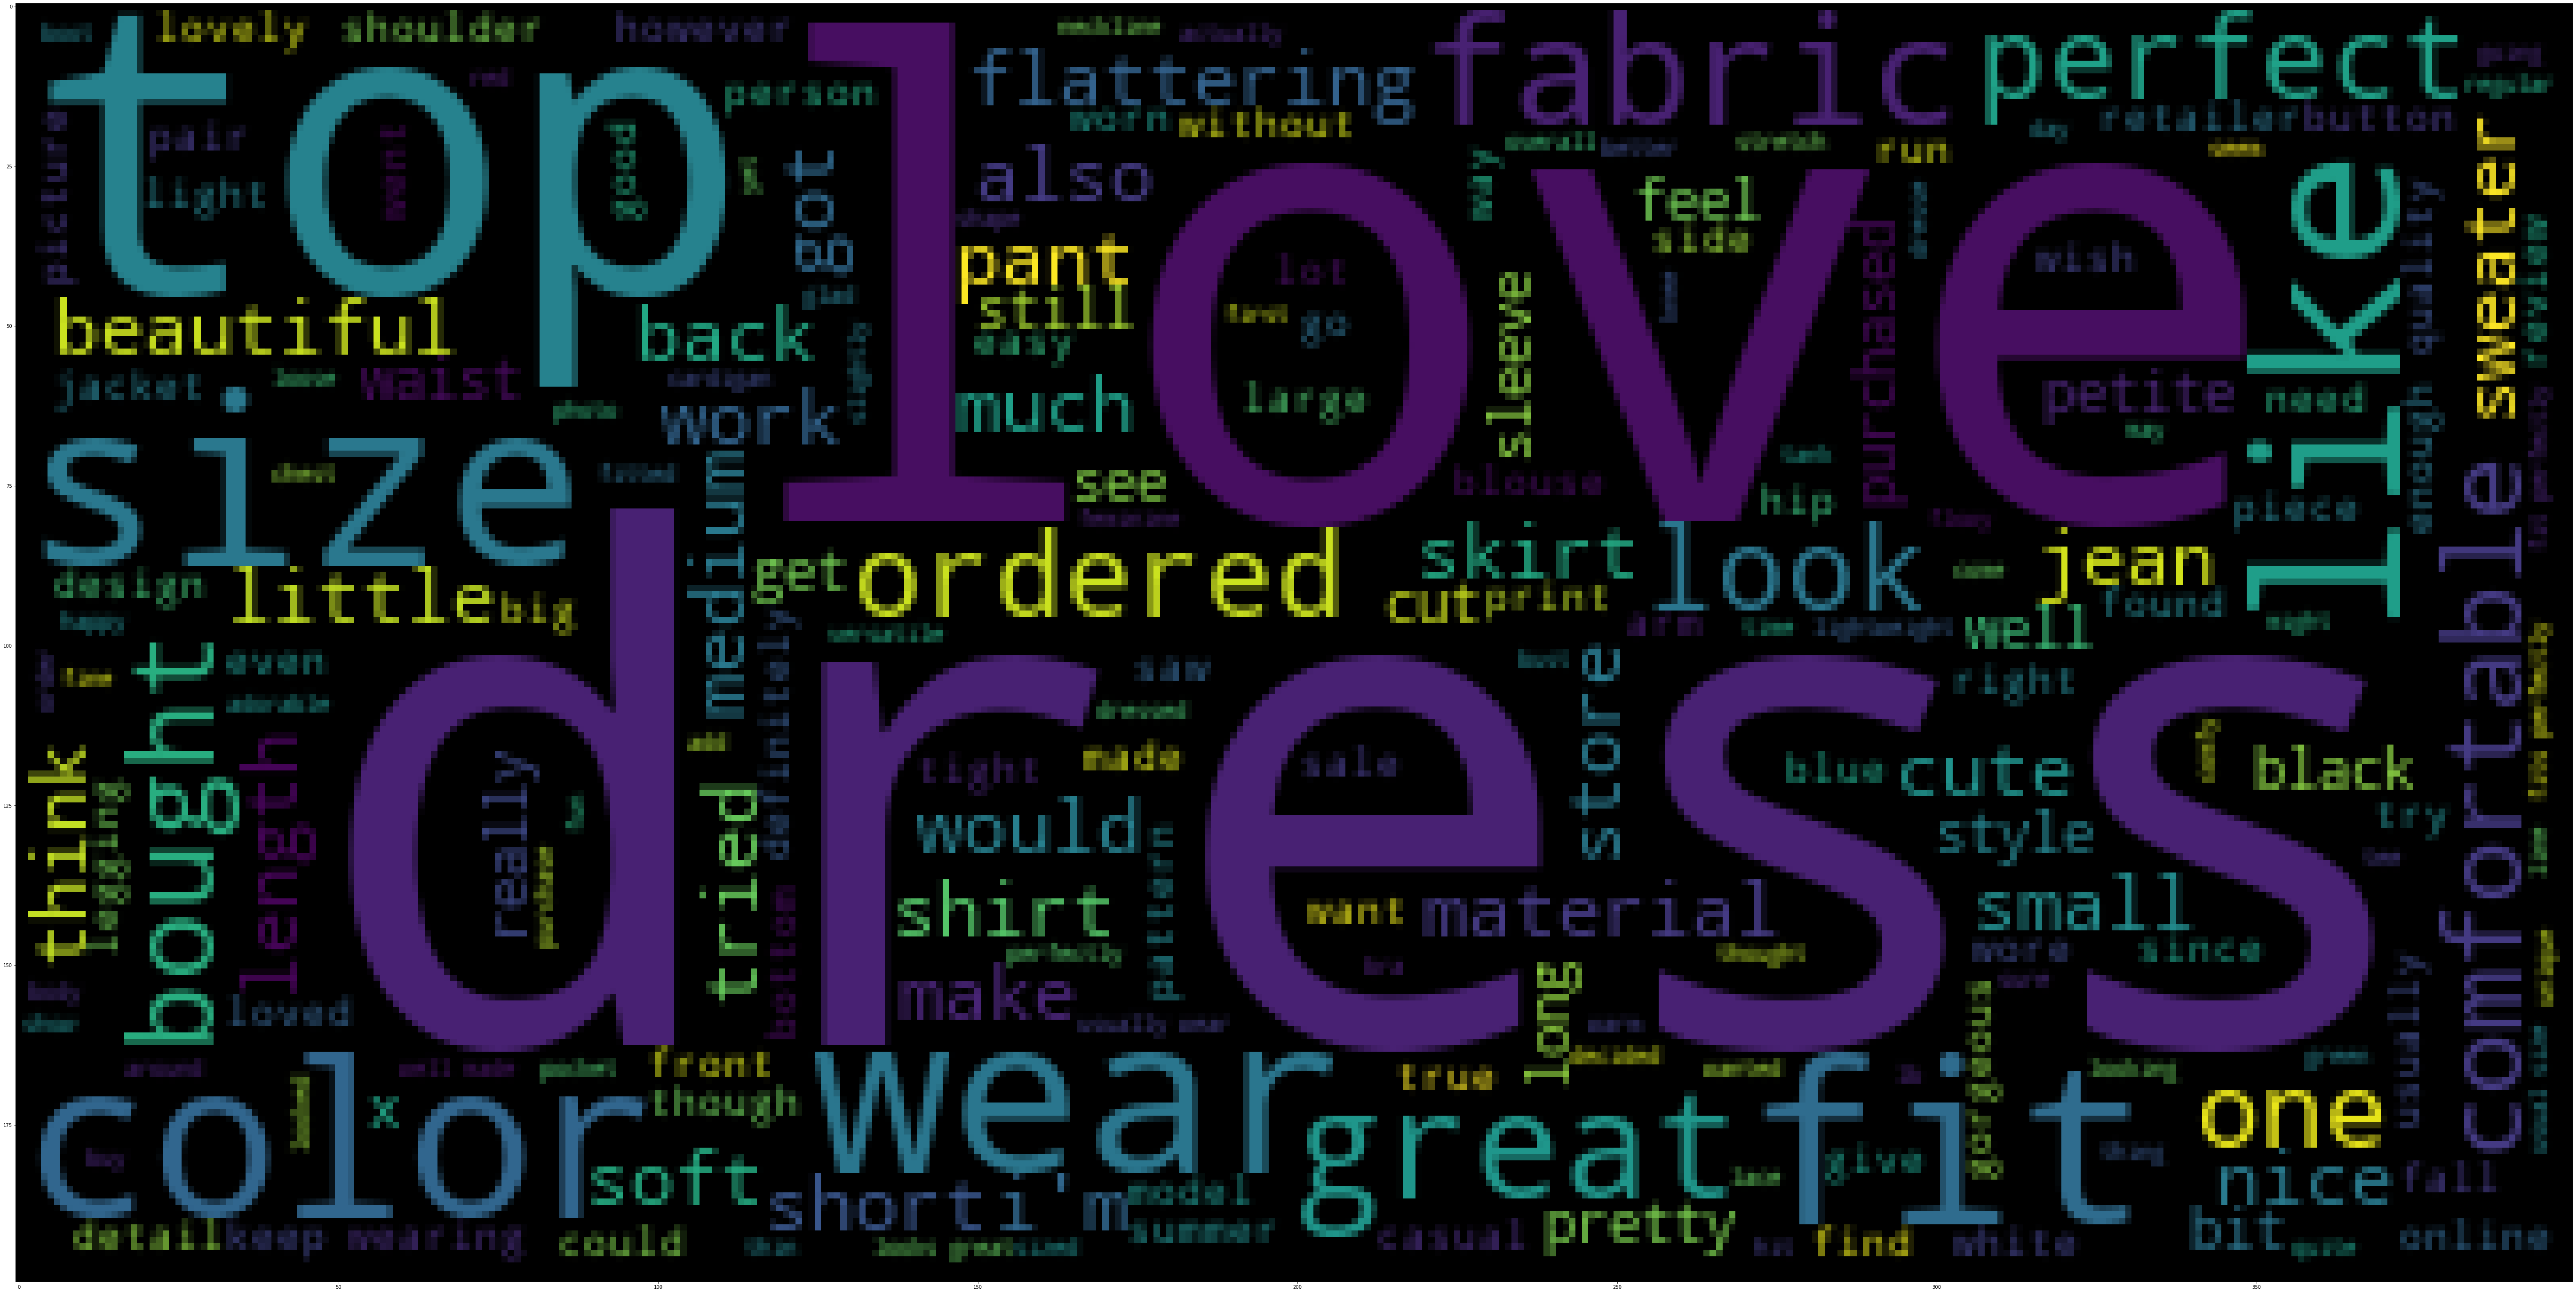

In [316]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(Positive_review.to_list()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

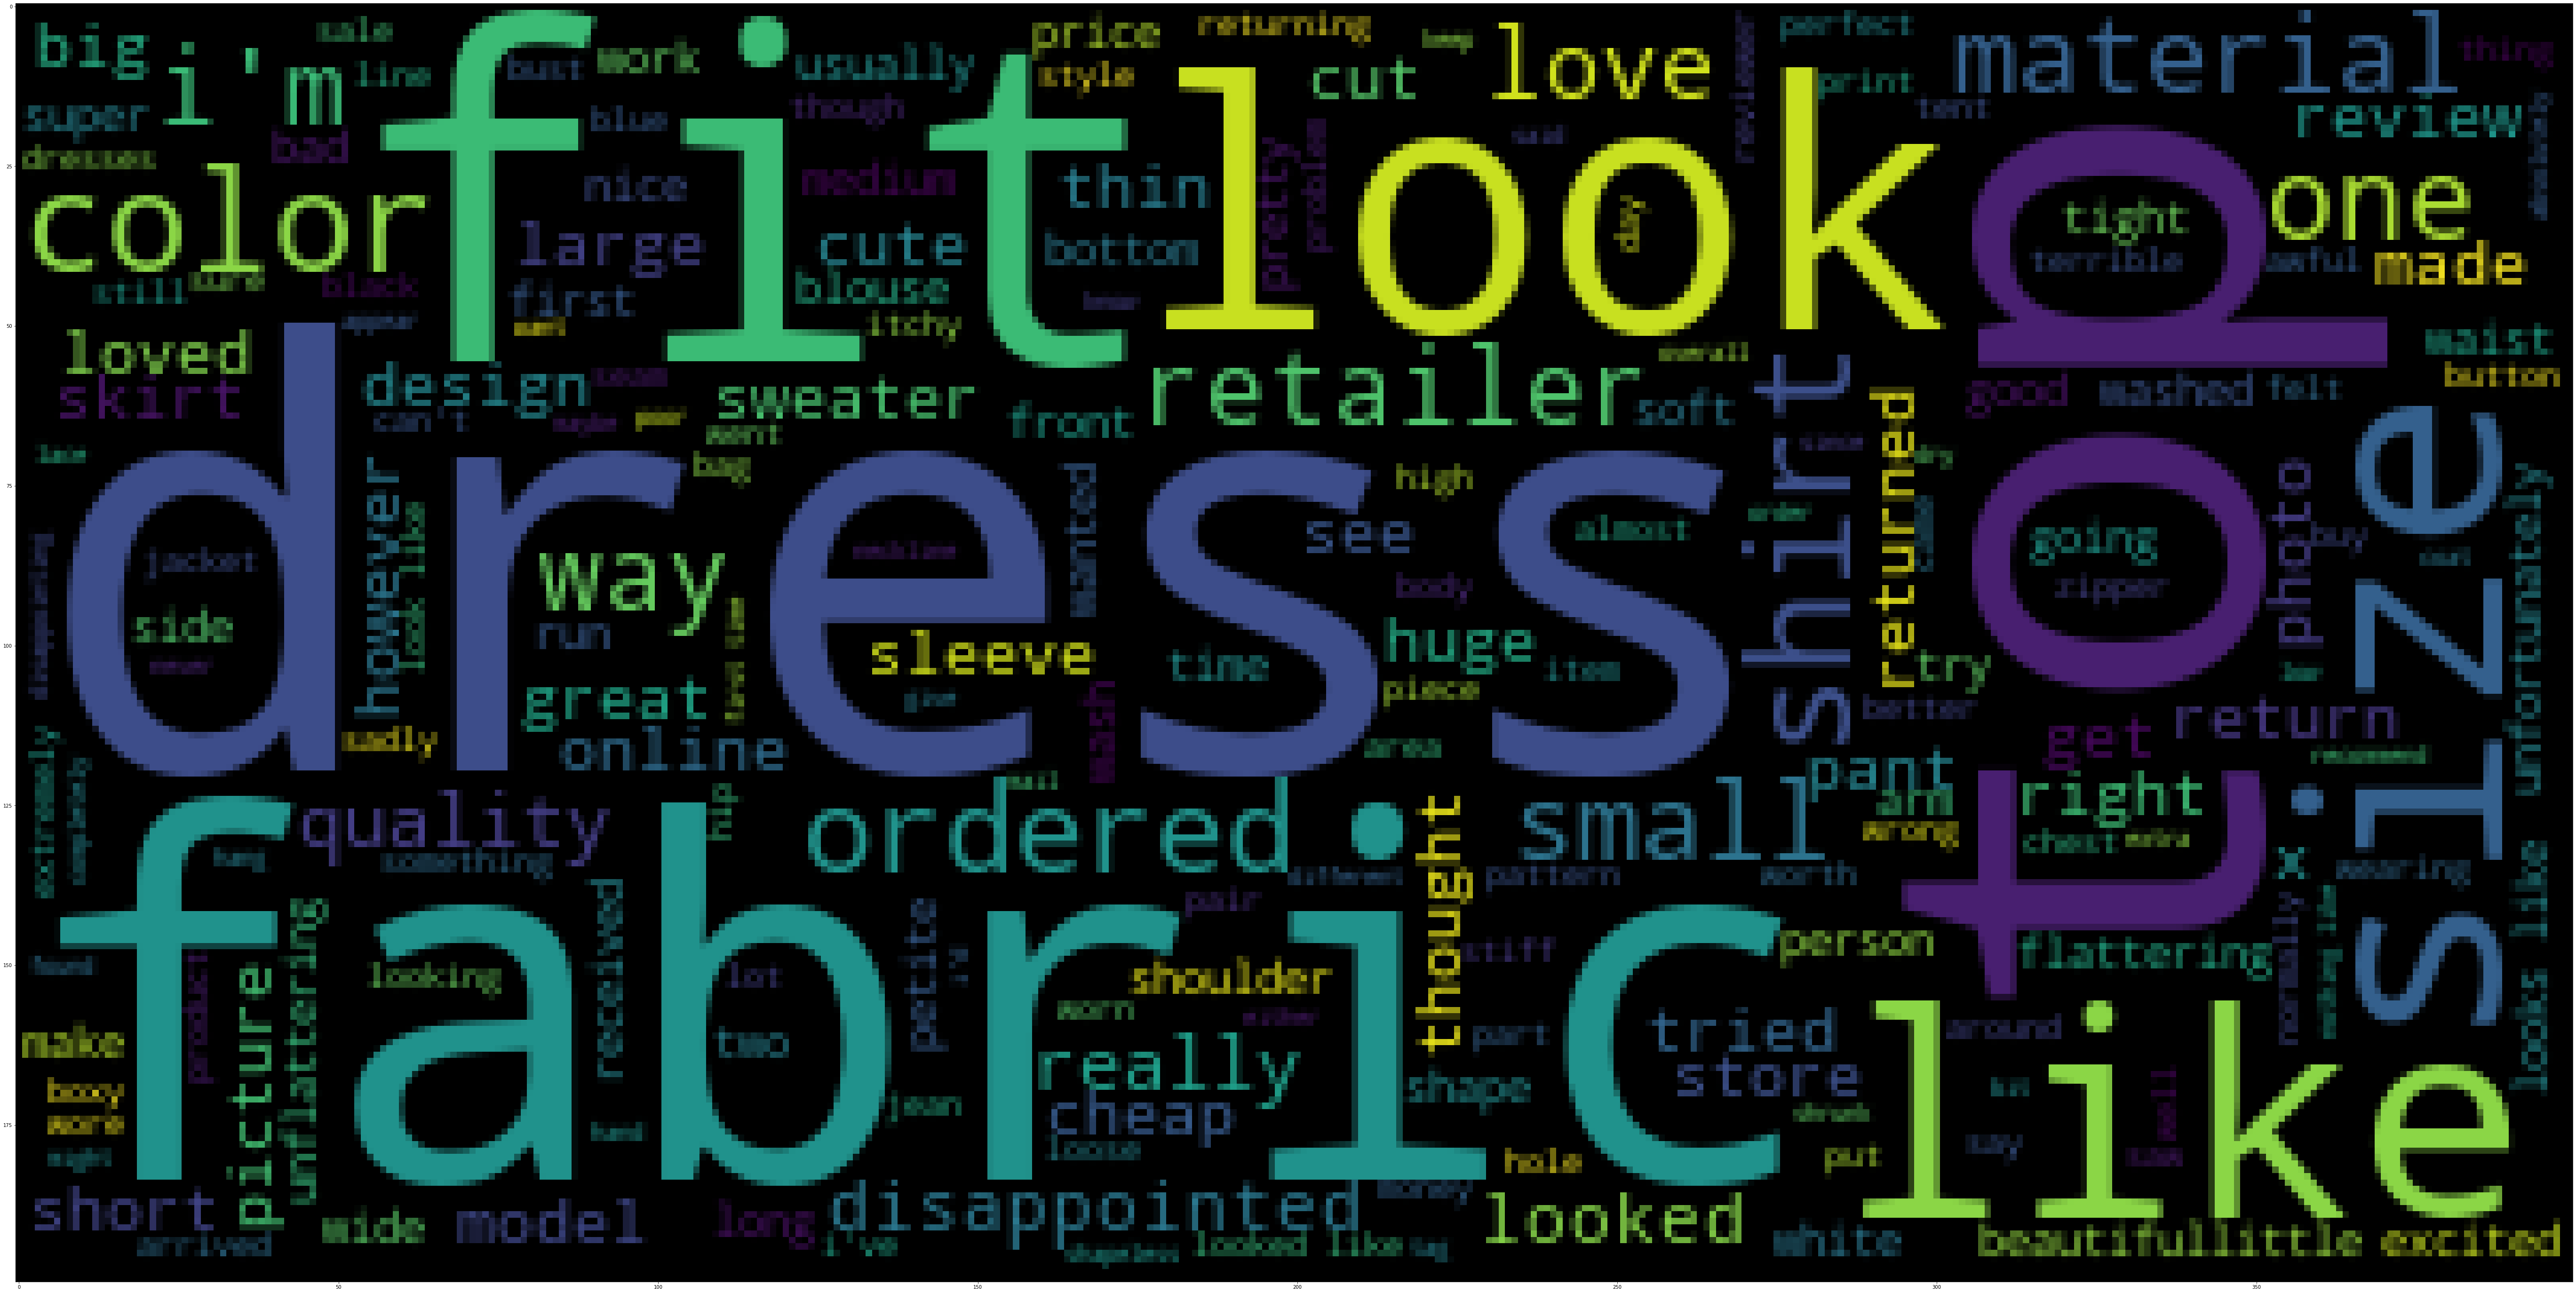

In [319]:
wordcloud_neg = WordCloud(stopwords=stop).generate(' '.join(Negative_review.to_list()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud_neg)

In [320]:
#model for predicting rating based on review
Y = data_1.Rating
X = data_1.clean_text

In [321]:
#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [322]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=123)

In [323]:
tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)
X_train_tfidf = tfidf_vect.fit_transform(train_X)
X_test_tfidf = tfidf_vect.transform(test_X)

In [324]:
dtm_tfidf_train=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
dtm_tfidf_test=pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names())

In [325]:
from sklearn.svm import LinearSVC

In [326]:
lsvc_model = LinearSVC(C=1.0).fit(dtm_tfidf_train, train_y)

In [327]:
print(metrics.classification_report(train_y, lsvc_model.predict(dtm_tfidf_train)))

print(metrics.classification_report(test_y, lsvc_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           1       0.78      0.51      0.61       492
           2       0.67      0.42      0.52       966
           3       0.60      0.53      0.56      1694
           4       0.57      0.39      0.46      3000
           5       0.77      0.94      0.84      7611

    accuracy                           0.72     13763
   macro avg       0.68      0.56      0.60     13763
weighted avg       0.70      0.72      0.70     13763

              precision    recall  f1-score   support

           1       0.32      0.18      0.23       199
           2       0.31      0.20      0.24       394
           3       0.40      0.33      0.36       770
           4       0.44      0.29      0.35      1289
           5       0.74      0.92      0.82      3247

    accuracy                           0.63      5899
   macro avg       0.44      0.38      0.40      5899
weighted avg       0.58      0.63      0.60      5899



In [328]:
lsvc_model.predict(dtm_tfidf_test)

array([4, 3, 2, ..., 5, 5, 3], dtype=int64)

In [340]:
#inferenc - applying model on new data
rev = input()

'pants are overpriced and very uncomfortable  to my utter dismay i wore them during a business trip for the first time and ended up with bruises caused by the side zipper  i have been a long time retailer shopper and usually my go to store  however ending up with a pair of pants that caused me pain was a very big disappointment '


In [344]:
rev

"'pants are overpriced and very uncomfortable  to my utter dismay i wore them during a business trip for the first time and ended up with bruises caused by the side zipper  i have been a long time retailer shopper and usually my go to store  however ending up with a pair of pants that caused me pain was a very big disappointment '"

In [346]:
lsvc_model.predict(tfidf_vect.transform(pd.Series(rev)))[0]

5

In [347]:
Positive_recommendation = data_1.clean_text[data_1.Flag==1]
Negative_recommendation = data_1.clean_text[data_1.Flag==0]

In [348]:
#model for predicting recommendation based on review
Y = data_1.Flag
X = data_1.clean_text

In [349]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=123)

In [350]:
tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)
X_train_tfidf = tfidf_vect.fit_transform(train_X)
X_test_tfidf = tfidf_vect.transform(test_X)

In [351]:
dtm_tfidf_train=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
dtm_tfidf_test=pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names())

In [352]:
from sklearn.svm import LinearSVC

In [353]:
lsvc_model = LinearSVC(C=1.0).fit(dtm_tfidf_train, train_y)

In [354]:
print(metrics.classification_report(train_y, lsvc_model.predict(dtm_tfidf_train)))

print(metrics.classification_report(test_y, lsvc_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76      2502
           1       0.94      0.97      0.95     11261

    accuracy                           0.92     13763
   macro avg       0.88      0.83      0.85     13763
weighted avg       0.91      0.92      0.91     13763

              precision    recall  f1-score   support

           0       0.73      0.60      0.66      1073
           1       0.91      0.95      0.93      4826

    accuracy                           0.89      5899
   macro avg       0.82      0.77      0.79      5899
weighted avg       0.88      0.89      0.88      5899



In [355]:
#inferenc - applying model on new data
rev_1 = input()

'i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments'


In [358]:
lsvc_model.predict(tfidf_vect.transform(pd.Series(rev_1)))[0]

1

In [359]:
#topic mining
# Importing Gensim
import gensim
from gensim import corpora

In [360]:
train_X

2407     i love this piece  it fits well and is comfort...
20893    this ran a bit small; i'm normally a 2  this w...
12410    this top is great to wear to work or for enjoy...
20077    i saw this dress online and i ordered immediat...
19606    i like the quality of material of this top but...
                               ...                        
16069    super cute  5'9" 135 lbs and the medium was pe...
9281     i was surprised retailer decided to ship this ...
18366    loved the dress  loved the pattern and the cut...
21180    i'm a big fan of level 99 jeans and linen pant...
18788    this dress didn't work for me for several reas...
Name: clean_text, Length: 13763, dtype: object

In [361]:
X_train_tokens = [doc.split() for doc in train_X]  

In [377]:
X_train_tokens

[['i',
  'love',
  'this',
  'piece',
  'it',
  'fits',
  'well',
  'and',
  'is',
  'comfortable',
  'you',
  'can',
  'dress',
  'it',
  'up',
  'or',
  'be',
  'more',
  'casual',
  'i',
  'have',
  'received',
  'many',
  'compliments',
  'already',
  'and',
  'it',
  'goes',
  'with',
  'many',
  'of',
  'my',
  'outfits'],
 ['this',
  'ran',
  'a',
  'bit',
  'small;',
  "i'm",
  'normally',
  'a',
  '2',
  'this',
  'was',
  'a',
  '4',
  'and',
  "'just'",
  'fit',
  'the',
  'pattern',
  'was',
  'very',
  "'digi",
  "'",
  'the',
  'length',
  'was',
  'shorter',
  'than',
  'i',
  'hoped',
  "(i'm",
  '5\'1")',
  'and',
  'the',
  'fabric',
  'while',
  'structured',
  'was',
  'just',
  'cheap',
  'and',
  'acrylic',
  'feeling',
  'pass'],
 ['this',
  'top',
  'is',
  'great',
  'to',
  'wear',
  'to',
  'work',
  'or',
  'for',
  'enjoying',
  'brunch',
  'or',
  'dinner',
  'with',
  'friends',
  'it',
  'is',
  'very',
  'comfortable',
  'and',
  'pairs',
  'great',
  '

In [362]:
dictionary = corpora.Dictionary(X_train_tokens)
print(dictionary)

Dictionary(15631 unique tokens: ['already', 'and', 'be', 'can', 'casual']...)


In [363]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in X_train_tokens]

In [364]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [365]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary)

In [366]:
print(ldamodel.print_topics(num_topics=10, num_words=20))

[(0, '0.063*"i" + 0.050*"it" + 0.038*"and" + 0.027*"a" + 0.026*"to" + 0.025*"the" + 0.022*"this" + 0.015*"on" + 0.015*"for" + 0.014*"in" + 0.013*"is" + 0.013*"with" + 0.012*"so" + 0.011*"was" + 0.011*"but" + 0.010*"dress" + 0.010*"my" + 0.009*"wear" + 0.009*"love" + 0.008*"be"'), (1, '0.057*"the" + 0.040*"a" + 0.038*"and" + 0.032*"is" + 0.031*"i" + 0.030*"it" + 0.025*"this" + 0.018*"to" + 0.015*"of" + 0.013*"in" + 0.011*"but" + 0.011*"with" + 0.010*"for" + 0.009*"on" + 0.009*"it\'s" + 0.009*"that" + 0.008*"so" + 0.008*"very" + 0.008*"dress" + 0.008*"top"'), (2, '0.055*"they" + 0.047*"i" + 0.033*"these" + 0.030*"the" + 0.030*"them" + 0.028*"are" + 0.022*"a" + 0.018*"and" + 0.015*"pants" + 0.013*"in" + 0.013*"of" + 0.012*"so" + 0.011*"my" + 0.010*"have" + 0.010*"love" + 0.010*"but" + 0.009*"with" + 0.009*"jeans" + 0.008*"on" + 0.008*"pair"'), (3, '0.085*"the" + 0.042*"i" + 0.032*"it" + 0.029*"and" + 0.022*"is" + 0.021*"a" + 0.017*"in" + 0.017*"was" + 0.015*"to" + 0.015*"on" + 0.014*"but"

In [379]:
topics = ldamodel.show_topics(formatted=False, num_words=20)
    
for t in range(len(topics)):
    print("\nTopic {}, top {} words:".format(t+1,20))
    print(" ".join([w[0] for w in topics[t][1]]))


Topic 1, top 20 words:
love color great wear top fit jean soft look perfect bought sweater size comfortable shirt like nice one well little

Topic 2, top 20 words:
dress fit size im look beautiful petite wear love like color fabric great ordered store comfortable flattering online perfect small

Topic 3, top 20 words:
size top small fit large im ordered medium would run like one wear look little shoulder love usually x arm

Topic 4, top 20 words:
like top look fabric really flattering material cut much fit back would also dress sleeve love nice little bit color

Topic 5, top 20 words:
fit would like im waist look size fabric skirt pant wear love back great ordered long way dress much short


In [368]:
#cleaning document
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) # can use regex
lemma = WordNetLemmatizer()
def clean(doc):
    # tokenization
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    # stop words
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    # lemmitization
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in data_1.clean_text]  

In [369]:
print(doc_clean)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [370]:
big_list = []
for lists in doc_clean:
    big_list += lists
big_list = set(big_list)
print(big_list)

{'sleeeves', 'jumped', 'drive', 'ahhhh', 'earnings', 'ada', 'bloom', 'tacked', 'vinta', 'essentially', 'missed', 'percect', 'cupped', 'roof', 'simplicity', 'preview', 'wight', 'bathing', 'implied', 'flouncy', 'st', 'armed', 'embellished', 'pilazzo', 'kuddos', 'usefulness', 'stating', 'looovvveee', 'half', 'elliot', 'htem', 'fancier', 'amazement', 'bargain', 'barney', 'wretched', 'dressied', 'survey', 'exposed', 'ergo', 'lin', 'steamer', 'geez', 'continuing', 'learned', 'compliements', 'atrociously', 'justifiable', 'crazy', 'formula', 'knotted', 'ine', 'pancho', 'feminie', 'rap', 'when', 'warrent', 'affordable', 'entirel', 'advice', 'remover', 'realizing', 'garter', 'remotely', 'rearranging', 'havnet', 'marine', 'thumb', 'carissima', 'balmy', 'flowly', 'middle', 'backless', 'fabric', 'tee', 'costumey', 'taupe', 'thinner', 'weighted', 'losing', 'expensiv', 'exquisitely', 'donampamp39t', 'resistance', 'but', 'trench', 'sloth', 'crease', 'spruce', 'underlying', 'meit', 'nix', 'suuuuuper', 

In [371]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

# (word index, freq in that document)

[[(5, 1),
  (7, 1),
  (17, 1),
  (38, 1),
  (41, 1),
  (75, 1),
  (78, 1),
  (107, 1),
  (111, 1),
  (118, 1),
  (120, 1),
  (125, 1),
  (129, 1),
  (139, 1),
  (146, 1),
  (148, 1),
  (232, 3),
  (233, 1),
  (255, 1),
  (298, 2),
  (327, 1),
  (509, 1),
  (578, 1),
  (663, 1),
  (684, 1),
  (834, 1),
  (900, 1),
  (986, 1),
  (1058, 1),
  (1087, 1),
  (1320, 1),
  (1550, 1),
  (1635, 2),
  (1999, 1),
  (2088, 1),
  (2336, 3),
  (2634, 1),
  (3593, 1),
  (3631, 1),
  (3997, 1),
  (10585, 2),
  (10586, 1)],
 [(14, 3),
  (67, 1),
  (77, 1),
  (203, 1),
  (423, 1),
  (646, 1),
  (964, 1),
  (985, 1),
  (1129, 1),
  (1351, 1),
  (4284, 1),
  (4564, 1)],
 [(14, 1),
  (25, 1),
  (45, 1),
  (77, 1),
  (282, 1),
  (310, 2),
  (320, 1),
  (363, 1),
  (432, 1),
  (513, 1),
  (562, 1),
  (949, 1),
  (1191, 1),
  (1583, 1),
  (3549, 1)],
 [(7, 4),
  (14, 2),
  (77, 1),
  (78, 1),
  (88, 1),
  (130, 1),
  (131, 1),
  (138, 1),
  (142, 1),
  (176, 2),
  (232, 1),
  (284, 1),
  (285, 1),
  (298, 1),


In [372]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [373]:
# Running LDA model on the document term matrix.
# n topics
# n words per topic
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=1)

In [376]:
for i in range(0,5):
    print("Topic",i)
    print(ldamodel.print_topic(i))
    print("--------------------------")

Topic 0
0.024*"love" + 0.020*"color" + 0.016*"great" + 0.014*"wear" + 0.014*"top" + 0.014*"fit" + 0.010*"jean" + 0.010*"soft" + 0.009*"look" + 0.009*"perfect"
--------------------------
Topic 1
0.083*"dress" + 0.015*"fit" + 0.010*"size" + 0.010*"im" + 0.009*"look" + 0.009*"beautiful" + 0.008*"petite" + 0.008*"wear" + 0.008*"love" + 0.008*"like"
--------------------------
Topic 2
0.034*"size" + 0.021*"top" + 0.020*"small" + 0.018*"fit" + 0.013*"large" + 0.012*"im" + 0.010*"ordered" + 0.010*"medium" + 0.010*"would" + 0.010*"run"
--------------------------
Topic 3
0.026*"like" + 0.021*"top" + 0.019*"look" + 0.014*"fabric" + 0.012*"really" + 0.011*"flattering" + 0.011*"material" + 0.009*"cut" + 0.008*"much" + 0.008*"fit"
--------------------------
Topic 4
0.016*"fit" + 0.014*"would" + 0.014*"like" + 0.014*"im" + 0.013*"waist" + 0.012*"look" + 0.011*"size" + 0.010*"fabric" + 0.010*"skirt" + 0.009*"pant"
--------------------------


In [ ]:
#By looking at the most frequent words in each topic,
#we have a sense that we may not reach any degree of separation across the topic categories